The **perceptron** algorithm is a straightforward method for classifying data into two categories. It learns by adjusting the weights assigned to input features based on classification mistakes. The algorithm aims to improve accuracy through iterative adjustments.

The predicted category (*y_pred*) is determined by the sign of a weighted sum of input features. The weights (*wi*) are updated using a simple formula:



```
wi = wi + learning_rate * (target - y_pred) * xi
```

**Hints for implementation:**

* weights: Initialize weights to zeros or small random values.  
* learning_rate: Set a small value to control the step size during updates.
* perceptron_predict: Implement the prediction function based on the weighted sum.
* train_perceptron: Iterate through the data for a specified number of epochs, * updating weights using the perceptron learning rule.
* data_points and labels: Use your own dataset and corresponding labels for training.



In [37]:
import numpy as np


class Perceptron:
    def __init__(self, lr=0.01, n_iter = 100):
        self.w = None
        self.lr = lr
        self.n_iter = n_iter

    def fit(self, X, Y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features + 1)
        self.errors = []

        for iter in range(self.n_iter):
            error=0
            for sample, label in zip(X,Y):
                update = self.lr * (label - self.predict(sample))
                self.w[1:] += update * sample
                self.w[0] += update
                error += int(update != 0.0)
            self.errors.append(error)
        return self

    def net_output(self, X):
        return np.sign(np.dot(X, self.w[1:]) + self.w[0])


    def predict(self, X_test):
        return np.where(self.net_output(X_test)>0, 1, -1)

    def plot_decision_boundary(self, X, y, X_test=None, y_test=None, title="Perceptron Decision Boundary"):
        plt.figure(figsize=(8, 6))

        # Plot the data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k', label='Training Data')

        # Plot the test data points
        if X_test is not None and y_test is not None:
            plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', s=100, label='Test Data')

        # Plot the decision boundary
        x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
        y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = self.net_output(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()

        plt.show()

        plt.show()


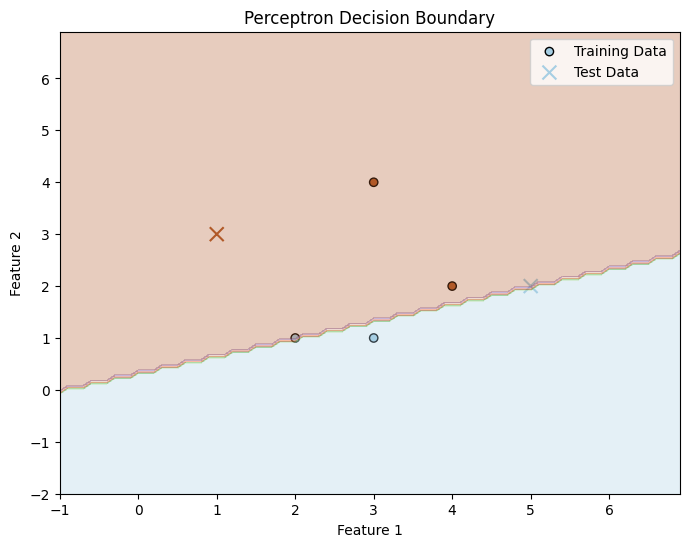

In [40]:
X = np.array([[2.0, 1.0], [3.0, 4.0], [4.0, 2.0], [3.0, 1.0]])
y = np.array([-1, 1, 1, -1])
perceptron = Perceptron(
    lr = 0.01,
    n_iter = 1000,
)
perceptron.fit(X, y)

X_test = np.array([[5.0, 2.0], [1.0, 3.0]])
y_test = np.array([-1, 1])
perceptron.predict(X_test)

perceptron.plot_decision_boundary(X, y, X_test, y_test, title="Perceptron Decision Boundary")
